In [5]:
import numpy as np        
import pandas as pd     
import seaborn as sns
import matplotlib.pyplot as plt
# to ignore warnings
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [6]:
df = pd.read_csv("bank_clean.csv", index_col=0)
df.head()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56,1,999,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
1,57,1,999,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
2,37,1,999,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
3,40,1,999,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
4,56,1,999,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            41188 non-null  int64
 1   campaign                       41188 non-null  int64
 2   pdays                          41188 non-null  int64
 3   previous                       41188 non-null  int64
 4   no_previous_contact            41188 non-null  int64
 5   not_working                    41188 non-null  int64
 6   job_admin.                     41188 non-null  int64
 7   job_blue-collar                41188 non-null  int64
 8   job_entrepreneur               41188 non-null  int64
 9   job_housemaid                  41188 non-null  int64
 10  job_management                 41188 non-null  int64
 11  job_retired                    41188 non-null  int64
 12  job_self-employed              41188 non-null  int64
 13  job_services    

In [10]:
df.y_yes.value_counts()

0    36548
1     4640
Name: y_yes, dtype: int64

In [11]:
df.y_no.value_counts()

1    36548
0     4640
Name: y_no, dtype: int64

In [12]:
df.drop("y_no", axis=1, inplace=True)

In [13]:
X = df.drop("y_yes", axis = 1)                                           
y = df['y_yes']    

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 42)

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [16]:
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression()))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM'  , SVC(probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('ET'   , ExtraTreesClassifier()))
    
    return basedModels

In [17]:
def BasedLine2(X_train, y_train,models):
    num_folds = 10
    scoring = 'accuracy'
    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

In [18]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)

LR: 0.897922 (0.002371)
LDA: 0.893552 (0.002242)
KNN: 0.891020 (0.002834)
CART: 0.831709 (0.004658)
NB: 0.861851 (0.005879)
SVM: 0.897818 (0.002794)
AB: 0.896015 (0.002380)
GBM: 0.898026 (0.001814)
RF: 0.889182 (0.002335)
ET: 0.873469 (0.002648)


In [24]:
rf=RandomForestClassifier().fit(X_train, y_train)

In [25]:
y_pred=rf.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, classification_report,precision_recall_curve
print(roc_auc_score(y_test, y_pred))
print("--------------")
print(recall_score(y_test, y_pred))
print("--------------")
print(precision_score(y_test, y_pred))
print("--------------")
print(accuracy_score(y_test, y_pred))
print("--------------")
print(confusion_matrix(y_test, y_pred))
print("--------------")
print(classification_report(y_test, y_pred))

0.6124724901657759
--------------
0.25557955363570917
--------------
0.5137481910274964
--------------
0.8891316662620377
--------------
[[10632   336]
 [ 1034   355]]
--------------
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10968
           1       0.51      0.26      0.34      1389

    accuracy                           0.89     12357
   macro avg       0.71      0.61      0.64     12357
weighted avg       0.87      0.89      0.87     12357



In [27]:
from pycaret import *

In [28]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (37069, 60)
Unseen Data For Predictions: (4119, 60)


In [29]:
from pycaret.classification import *

In [32]:
df.columns

Index(['age', 'campaign', 'pdays', 'previous', 'no_previous_contact', 'not_working', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_no', 'default_unknown', 'default_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'pout

In [34]:
models = setup(data = data, target = 'y_yes', numeric_features=['age', 'campaign', 'pdays', 'previous', 'no_previous_contact', 'not_working', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_no', 'default_unknown', 'default_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success'], session_id=123) 

,Description,Value
0,session_id,123
1,Target,y_yes
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(37069, 60)"
5,Missing Values,False
6,Numeric Features,59
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [35]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9000,0.7730,0.2235,0.6292,0.3295,0.2884,0.3343,0.3000
gbc,Gradient Boosting Classifier,0.8996,0.7719,0.2017,0.6398,0.3064,0.2677,0.3206,2.2190
lr,Logistic Regression,0.8993,0.7567,0.1797,0.6562,0.2816,0.2459,0.3071,1.8830
ridge,Ridge Classifier,0.8993,0.0000,0.1940,0.6439,0.2976,0.2597,0.3153,0.0650
ada,Ada Boost Classifier,0.8979,0.7587,0.1804,0.6272,0.2798,0.2426,0.2984,0.6310
catboost,CatBoost Classifier,0.8975,0.7692,0.2214,0.5929,0.3221,0.2789,0.3191,17.5130
xgboost,Extreme Gradient Boosting,0.8966,0.7593,0.2361,0.5746,0.3345,0.2888,0.3228,3.1500
lda,Linear Discriminant Analysis,0.8953,0.7544,0.2823,0.5499,0.3723,0.3216,0.3434,0.2650
rf,Random Forest Classifier,0.8917,0.7452,0.2336,0.5186,0.3219,0.2721,0.2980,1.9180
knn,K Neighbors Classifier,0.8915,0.6622,0.1790,0.5197,0.2659,0.2222,0.2596,3.3230


In [38]:
lightgbm=create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8998,0.7440,0.2070,0.6344,0.3122,0.2729,0.3235
1,0.9021,0.7700,0.2386,0.6476,0.3487,0.3078,0.3532
2,0.8936,0.7479,0.2070,0.5413,0.2995,0.2542,0.2889
3,0.9040,0.7880,0.2622,0.6637,0.3759,0.3344,0.3771
4,0.8987,0.7836,0.2203,0.6117,0.3239,0.2820,0.3255
5,0.9002,0.7684,0.2168,0.6392,0.3238,0.2838,0.3329
6,0.8990,0.7771,0.2308,0.6111,0.3350,0.2923,0.3333
7,0.9029,0.7985,0.2168,0.6889,0.3298,0.2925,0.3503
8,0.8986,0.7772,0.2175,0.6078,0.3204,0.2786,0.3222
9,0.9009,0.7758,0.2175,0.6458,0.3255,0.2859,0.3360


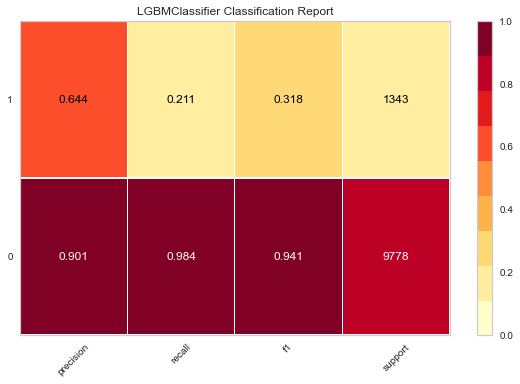

In [40]:
plot_model(lightgbm, plot = 'class_report')

In [41]:
evaluate_model(lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [42]:
final_lightgbm = finalize_model(lightgbm)

In [43]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_yes,Label,Score
0,45,1,999,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0.9746
1,29,1,999,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0.9701
2,35,1,999,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0.9712
3,39,1,999,0,1,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0.9742
4,55,2,999,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0.9751


In [45]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['y_yes'], unseen_predictions['Label'], metric = 'Accuracy')

0.9